In [1]:
import json
import glob
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import backend as K

from IPython import display



In [2]:
LAYER_BLOCKS = 0
LAYER_COINS = 1
LAYER_ENEMIES = 2
NLAYERS = 3

class GameMap:
    def __init__(self):
        self.levels = []
        self.widths = []
        self.heights = []
        self.nmaps = 0
        
        with open("Zelda/zelda.json") as f:
            self.tiledefs = json.load(f)
            #print(self.tiledefs)
        
        for fname in sorted(glob.glob("Zelda/zelda/zelda_lvl*.txt")):
            #print(fname)
            with open(fname) as f:
                data = [line.strip() for line in f.readlines()]
                self.levels.append(data)
                self.heights.append(len(data))
                self.widths.append(len(data[0]))
                self.nmaps += 1

    def getMaps(self, level=0):
        layers = np.ndarray((self.heights[level], self.widths[level], NLAYERS), dtype=np.bool)
        layers.fill(0)
        for r, row in enumerate(self.levels[level]):
            for c, tile in enumerate(row):
                if tile in ('1','2','3'):
                    layers[r,c,LAYER_ENEMIES] = 1
                elif tile in ('+'):
                    layers[r,c,LAYER_COINS] = 1
                elif tile in ('w'):
                    pass
                else:
                    layers[r,c,LAYER_BLOCKS] = 1
                
        return layers[:,:,LAYER_BLOCKS]
    
    def getMapsRange(self, from_level=0, to_level=None):
        if to_level == None:
            to_level = self.nmaps
        return np.concatenate([self.getMaps(i) for i in range(from_level, to_level)], axis=1)
            
    def getMapsRangeWindowed(self, windowsize = 2, from_level=0, to_level=None):
        a = self.getMapsRange(from_level, to_level)
        windows = np.concatenate([np.roll(a,-shift,axis=1) for shift in range(windowsize)])
        return windows
            

In [3]:
gm = GameMap()
a = gm.getMapsRangeWindowed(4,0,5)
at = a.transpose()


#print(json.dumps(gm.tiledefs, indent=2))

(0.0, 100.0)

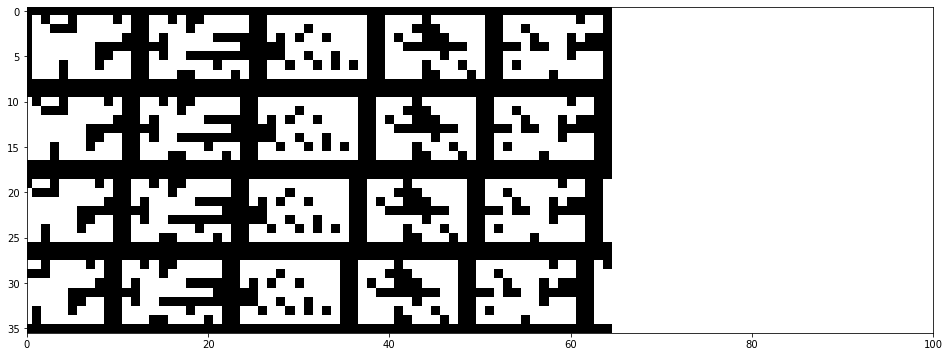

In [4]:
fig, axes = plt.subplots(1,1,figsize=(20,6))
axes.imshow(at.transpose(),cmap="gray", interpolation="nearest")
axes.set_xlim(0,100)

In [31]:
print(at.shape[1])
print(at)

36
[[False False False ...  True  True False]
 [False  True  True ... False False False]
 [False False  True ...  True  True False]
 ...
 [False  True  True ... False False False]
 [False  True  True ...  True  True False]
 [False False False ...  True  True False]]


In [5]:
in_out_size = at.shape[1]
print(in_out_size)
hiddensize =2 #int(in_out_size*.25)
model = Sequential()
model.add(Dense(hiddensize, input_shape=(in_out_size,)))
model.add(Activation("relu"))
model.add(Dropout(0))
model.add(Dense(in_out_size))
# leaving off this final relu seems to do a much better job
#model.add(Activation("relu"))
model.add(Activation("sigmoid"))

# "mse" seems to be the best loss function for the problem
# "RMSprop" seems to be the best, with "adadelta" also good
model.compile(loss='mse', optimizer='RMSprop', metrics=['accuracy'])



36


In [6]:
in_out_size = at.shape[1]
model = Sequential()
model.add(Dense(hiddensize, input_shape=(in_out_size,)))
model.add(Activation("relu"))

model.add(Dense(int(in_out_size/2)))
model.add(Activation("relu"))

model.add(Dense(int(2)))
model.add(Activation("relu"))

model.add(Dense(int(in_out_size/2)))
model.add(Activation("relu"))

model.add(Dense(in_out_size))
# leaving off this final relu seems to do a much better job
#model.add(Activation("relu"))
model.add(Activation("sigmoid"))

# "mse" seems to be the best loss function for the problem
# "RMSprop" seems to be the best, with "adadelta" also good
model.compile(loss='mse', optimizer='RMSprop', metrics=['accuracy'])



In [7]:
in_out_size = at.shape[1]
dropout = 0
model = Sequential()
model.add(Dense( int(in_out_size*.9), input_shape=(in_out_size,)))
model.add(Activation("relu"))
model.add(Dropout(dropout))

model.add(Dense(int(in_out_size*.8)))
model.add(Activation("relu"))
model.add(Dropout(dropout))


model.add(Dense(int(in_out_size*.5)))
model.add(Activation("relu"))
model.add(Dropout(dropout))

model.add(Dense(int(in_out_size*.8)))
model.add(Activation("relu"))
model.add(Dropout(dropout))


model.add(Dense(int(in_out_size*.9)))
model.add(Activation("relu"))
model.add(Dropout(dropout))

model.add(Dense(in_out_size))

# leaving off this final relu seems to do a much better job.  I think you don't want
# your final activation to be something with hard cutoffs.
#model.add(Activation("relu"))
model.add(Activation("sigmoid"))

# "mse" seems to be the best loss function for the problem
# "RMSprop" seems to be the best, with "adadelta" also good
model.compile(loss='mse', optimizer='RMSprop', metrics=['accuracy'])


In [8]:
in_out_size = at.shape[1]
dropout = 0
model = Sequential()
model.add(Dense( int(in_out_size*1.5), input_shape=(in_out_size,)))
model.add(Activation("relu"))

model.add(Dense(int(in_out_size*.8)))
model.add(Activation("relu"))

model.add(Dense(int(in_out_size*.5)))
model.add(Activation("relu"))

model.add(Dense(int(in_out_size*.25)))
model.add(Activation("relu"))

model.add(Dense(int(8)))
model.add(Activation("relu"))

model.add(Dense(int(4)))
model.add(Activation("relu"))

model.add(Dense(int(2)))
model.add(Activation("relu"))

model.add(Dense(int(4)))
model.add(Activation("relu"))


model.add(Dense(int(8)))
model.add(Activation("relu"))


model.add(Dense(int(in_out_size*.5)))
model.add(Activation("relu"))

model.add(Dense(int(in_out_size*.8)))
model.add(Activation("relu"))

model.add(Dense(int(in_out_size*1.5)))
model.add(Activation("relu"))

model.add(Dense(in_out_size))

# leaving off this final relu seems to do a much better job.  I think you don't want
# your final activation to be something with hard cutoffs.
#model.add(Activation("relu"))
model.add(Activation("sigmoid"))

# "mse" seems to be the best loss function for the problem
# "RMSprop" seems to be the best, with "adadelta" also good
model.compile(loss='mse', optimizer='adadelta', metrics=['accuracy'])


In [9]:
model.layers

In [10]:
get_hidden_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
test_a = gm.getMapsRangeWindowed(4, 0, 1)
test_at = test_a.transpose()

hidden_layer_output = get_hidden_layer_output([test_at])[0]



In [32]:
print(test_at)

[[False False False False False False False False False False  True  True
   True  True  True  True  True False False  True  True False  True  True
   True  True False False  True  True  True False  True  True  True False]
 [False  True  True  True  True  True  True  True False False  True  True
  False  True  True  True  True False False  True  True  True False  True
   True  True False False  True False  True False  True  True  True False]
 [False  True  True False  True  True  True  True False False  True  True
   True False  True  True  True False False  True False  True False  True
   True  True False False False False False False  True False False False]
 [False  True  True  True False  True  True  True False False  True False
   True False  True  True  True False False False False False False  True
  False False False False  True False False False  True  True False False]
 [False  True False  True False  True  True  True False False False False
  False False  True False False Fa

In [11]:
hidden_layer_output

array([[0.00000000e+00, 6.29661560e-01, 8.20247978e-02, 0.00000000e+00,
        8.67218018e-01, 3.92732441e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.33991671e-01, 7.28970647e-01, 4.41427469e-01,
        0.00000000e+00, 0.00000000e+00, 5.55253208e-01, 1.12505007e+00,
        9.98876810e-01, 0.00000000e+00, 5.26795268e-01, 3.36838305e-01,
        0.00000000e+00, 5.31002164e-01, 0.00000000e+00, 0.00000000e+00,
        4.07137662e-01, 0.00000000e+00, 0.00000000e+00, 1.21322000e+00,
        0.00000000e+00, 1.73623443e-01, 0.00000000e+00, 9.58450437e-01,
        4.62044358e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.64807940e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.39812863e+00, 2.04116750e+00,
        0.00000000e+00, 9.18872356e-01, 1.30832508e-01, 5.01152039e-01,
        6.99465752e-01, 0.00000000e+00, 0.00000000e+00, 7.04111338e-01,
        4.42569852e-01, 0.00000000e+00],
       [0.00000000e+00,

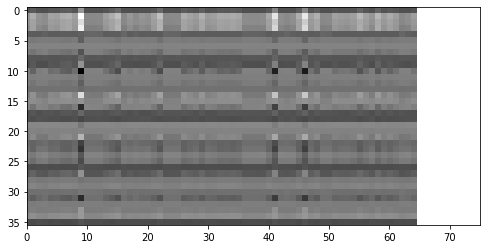

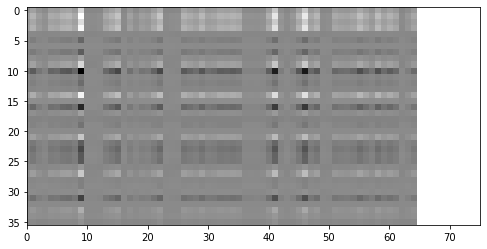

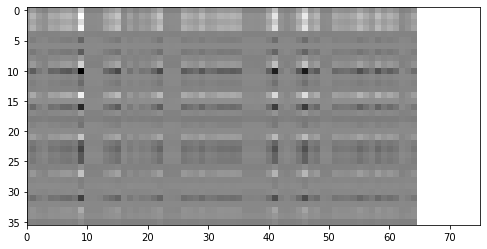

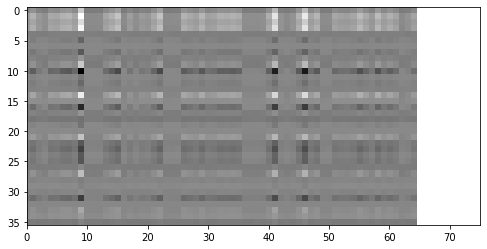

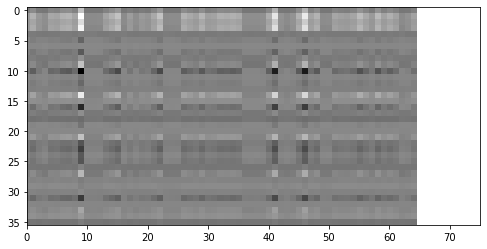

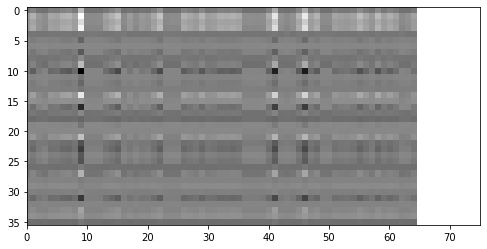

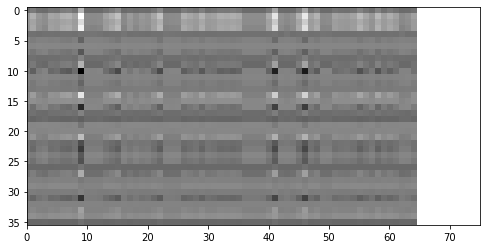

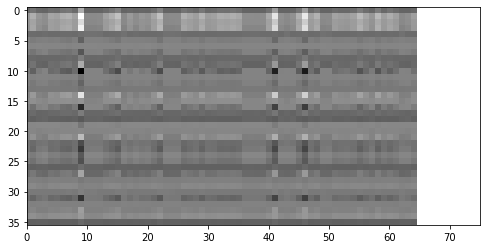

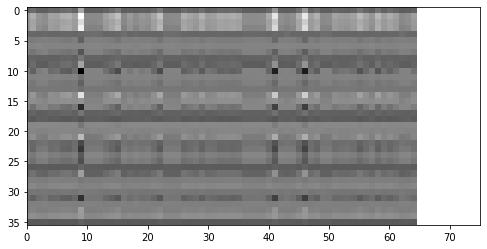

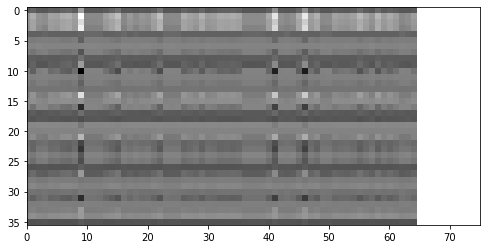

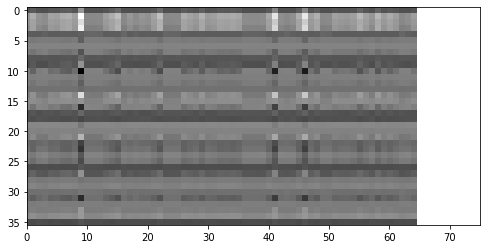

In [12]:
for i in range(10):
    history = model.fit(at, at, epochs=50, batch_size=64, shuffle=True, verbose=False)
    #print(history.history['acc'][-1])
    pt = model.predict(at)
    p = pt.transpose()
    fig, axes = plt.subplots(1,1,figsize=(16,4))
    axes.imshow(p,cmap="gray", interpolation="nearest");
    axes.set_xlim(0,75)
    display.clear_output(wait=True)
    display.display(plt.gcf());
    #axes[1].imshow(a,cmap="gray", interpolation="nearest")

584.5897

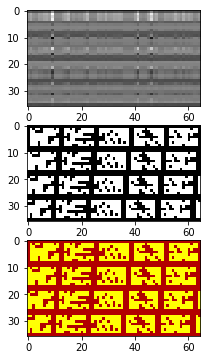

In [13]:
test_a = gm.getMapsRangeWindowed(4, 0, 5)
test_at = test_a.transpose()
test_pt = model.predict(test_at)
test_p = test_pt.transpose()
fig, axes = plt.subplots(3,figsize=(100,6))
axes[0].imshow(test_p,cmap="gray", interpolation="nearest")
axes[1].imshow(test_a,cmap="gray", interpolation="nearest")
axes[2].imshow(test_a-test_p, interpolation="nearest", cmap="hot", vmin=-1, vmax=1)
np.sum(pow(test_a-test_p,2))

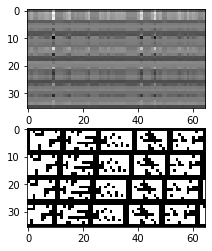

In [14]:
pt = model.predict(at)
p = pt.transpose()
fig, axes = plt.subplots(2,1,figsize=(16,4))
axes[0].imshow(p,cmap="gray", interpolation="nearest")
axes[1].imshow(a,cmap="gray", interpolation="nearest")

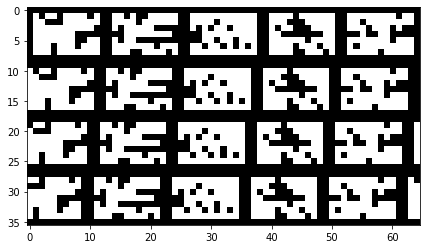

In [15]:
pt = model.predict(at)
p = pt.transpose()
fig, axes = plt.subplots(1,1,figsize=(16,4))
axes.imshow(a-p,cmap="gray", interpolation="nearest")


(0.0, 75.0)

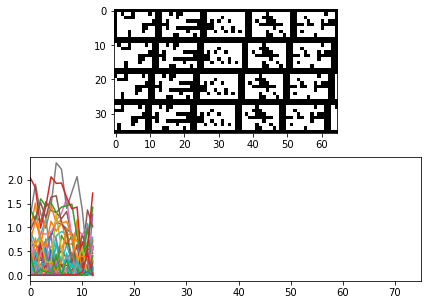

In [16]:
fig, axes = plt.subplots(2,figsize=(7,5))
axes[0].imshow(test_a,cmap="gray", interpolation="nearest")
axes[1].plot(hidden_layer_output[:])
axes[1].set_xlim(0,75)
#axes[1].scatter(hidd en_layer_output[:,0], hidden_layer_output[:,1])
#axes[1].imshow(hidden_layer_output.transpose(),cmap="gray", interpolation="nearest")

In [17]:
model.layers

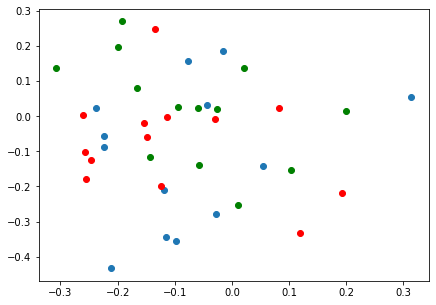

In [18]:
fig, axes = plt.subplots(1,figsize=(7,5))

get_hidden_layer_output = K.function([model.layers[0].input],
                                  [model.layers[4].output])

if True:
    test_a = gm.getMapsRangeWindowed(4, 0, 1)
    test_at = test_a.transpose()
    hidden_layer_output_A = get_hidden_layer_output([test_at])[0]
    plt.scatter(hidden_layer_output_A[:,0], hidden_layer_output_A[:,1], alpha=1)

if True:
    test_a = gm.getMapsRangeWindowed(4, 1, 2)
    test_at = test_a.transpose()
    hidden_layer_output_B = get_hidden_layer_output([test_at])[0]
    plt.scatter(hidden_layer_output_B[:,0], hidden_layer_output_B[:,1], color="green", alpha=1)

if True:
    test_a = gm.getMapsRangeWindowed(4, 2, 3)
    test_at = test_a.transpose()
    hidden_layer_output = get_hidden_layer_output([test_at])[0]
    plt.scatter(hidden_layer_output[:,0], hidden_layer_output[:,1], color="red", alpha=1)

if False:
    test_a = gm.getMapsRangeWindowed(4, 3, 4)
    test_at = test_a.transpose()
    hidden_layer_output = get_hidden_layer_output([test_at])[0]
    plt.scatter(hidden_layer_output[:,0], hidden_layer_output[:,1], color="orange", alpha=.5)



In [19]:
hidden_layer_output_A

array([[ 0.05473968, -0.14120965, -0.47438407,  0.13577187, -0.9391118 ,
        -0.73181546, -0.06138577, -0.5656669 ,  0.10538684, -0.17031376,
        -0.38350454, -0.9597273 , -0.40733078, -0.48703477,  0.5527987 ,
        -0.01573296,  0.13175076, -0.86638784],
       [-0.22425331, -0.05604824, -0.5265307 ,  0.07652354, -0.34824362,
        -1.0894794 ,  0.24653208, -0.81301147,  0.15201563, -0.356752  ,
        -0.44542018, -1.2452903 , -0.40680867, -0.98710847,  0.64364105,
        -0.28345615,  0.1962702 , -0.70494866],
       [-0.11616445, -0.34391144, -0.6025249 ,  0.27452555, -0.30767033,
        -0.42573565,  0.15877156, -0.7799236 ,  0.0052478 , -0.6576821 ,
        -0.3694914 , -0.83124524, -0.7069916 , -0.729063  ,  0.5677379 ,
        -0.10959845, -0.12840226, -0.7283452 ],
       [-0.09810477, -0.35672137, -0.6063158 ,  0.38106635, -0.7627249 ,
        -0.7098891 , -0.20235538, -0.26235196, -0.04225278, -0.5297934 ,
        -0.562308  , -1.2788335 , -0.58824486, -0.726

In [20]:
model.layers

In [21]:
for layer in model.layers:
    print(layer.output_shape)

(None, 54)
(None, 54)
(None, 28)
(None, 28)
(None, 18)
(None, 18)
(None, 9)
(None, 9)
(None, 8)
(None, 8)
(None, 4)
(None, 4)
(None, 2)
(None, 2)
(None, 4)
(None, 4)
(None, 8)
(None, 8)
(None, 18)
(None, 18)
(None, 28)
(None, 28)
(None, 54)
(None, 54)
(None, 36)
(None, 36)


In [22]:
# make some fake input!
h = np.ndarray(shape=(150,2))
h[:,0] = np.random.normal(loc=hidden_layer_output_B[8,0], scale=2, size=150)
h[:,1] = np.random.normal(loc=hidden_layer_output_B[8,1], scale=2, size=150)
#h[:,0].fill(hidden_layer_output_B[8,0])
#h[:,1].fill(hidden_layer_output_B[8,1])
hidden_layer_output_B[8,0], hidden_layer_output_B[8,1]

(-0.30717552, 0.13836479)

In [23]:
model.layers

In [24]:
inject_fake_hidden = K.function([model.layers[5].input],
                                [model.layers[-1].output])

#X = inject_fake_hidden([hidden_layer_output])[0].transpose()
X = inject_fake_hidden([h])[0].transpose()

#th = 0.1
#X[ X <= th] = 0
#X[ X > th] = 1

plt.imshow(X[:14,:], cmap="gray", interpolation="nearest")

Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: dense_15/BiasAdd:0


ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 36), dtype=tf.float32, name='dense_13_input'), name='dense_13_input', description="created by layer 'dense_13_input'") at layer "dense_13". The following previous layers were accessed without issue: []

In [83]:
fig, axes = plt.subplots(1,figsize=(7,5))
inject_fake_hidden = K.function([model.layers[4].input],
                                [model.layers[0].output])

inject_fake_hidden([hidden_layer_output])

if True:
    test_a = gm.getMapsRangeWindowed(4, 0, 1)
    test_at = test_a.transpose()
    hidden_layer_output = get_hidden_layer_output([test_at])[0]
    plt.scatter(hidden_layer_output[:,0], hidden_layer_output[:,1], alpha=1)

if True:
    test_a = gm.getMapsRangeWindowed(4, 1, 2)
    test_at = test_a.transpose()
    hidden_layer_output = get_hidden_layer_output([test_at])[0]
    plt.scatter(hidden_layer_output[:,0], hidden_layer_output[:,1], color="green", alpha=1)

if True:
    test_a = gm.getMapsRangeWindowed(4, 2, 3)
    test_at = test_a.transpose()
    hidden_layer_output = get_hidden_layer_output([test_at])[0]
    plt.scatter(hidden_layer_output[:,0], hidden_layer_output[:,1], color="red", alpha=1)

if False:
    test_a = gm.getMapsRangeWindowed(4, 3, 4)
    test_at = test_a.transpose()
    hidden_layer_output = get_hidden_layer_output([test_at])[0]
    plt.scatter(hidden_layer_output[:,0], hidden_layer_output[:,1], color="orange", alpha=.5)



Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: dense_8/BiasAdd:0


ValueError: Graph disconnected: cannot obtain value for tensor Tensor("dense_7_input:0", shape=(None, 36), dtype=float32) at layer "dense_7". The following previous layers were accessed without issue: []

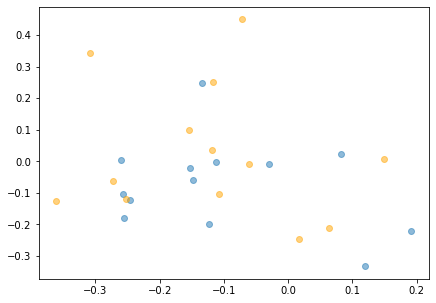

In [29]:
fig, axes = plt.subplots(1,figsize=(7,5))

get_hidden_layer_output = K.function([model.layers[0].input],
                                  [model.layers[4].output])

test_a = gm.getMapsRangeWindowed(4, 2, 3)
test_at = test_a.transpose()
hidden_layer_output = get_hidden_layer_output([test_at])[0]
plt.scatter(hidden_layer_output[:,0], hidden_layer_output[:,1], alpha=.5)

if False:
    test_a = gm.getMapsRangeWindowed(4, 1, 2)
    test_at = test_a.transpose()
    hidden_layer_output = get_hidden_layer_output([test_at])[0]
    plt.scatter(hidden_layer_output[:,0], hidden_layer_output[:,1], color="green", alpha=.5)

if False:
    test_a = gm.getMapsRangeWindowed(4, 2, 3)
    test_at = test_a.transpose()
    hidden_layer_output = get_hidden_layer_output([test_at])[0]
    plt.scatter(hidden_layer_output[:,0], hidden_layer_output[:,1], color="red", alpha=.5)


test_a = gm.getMapsRangeWindowed(4, 3, 4)
test_at = test_a.transpose()
hidden_layer_output = get_hidden_layer_output([test_at])[0]
plt.scatter(hidden_layer_output[:,0], hidden_layer_output[:,1], color="orange", alpha=.5)



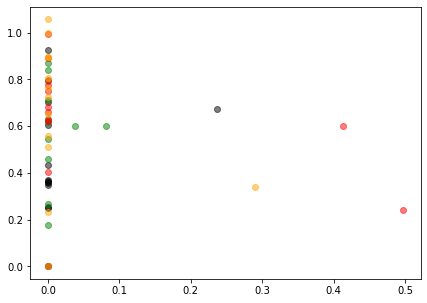

In [33]:
fig, axes = plt.subplots(1,figsize=(7,5))

get_hidden_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])

test_a = gm.getMapsRangeWindowed(4, 1, 2)
test_at = test_a.transpose()
hidden_layer_output = get_hidden_layer_output([test_at])[0]
plt.scatter(hidden_layer_output[:,0], hidden_layer_output[:,1], color="black", alpha=.5)

if True:
    test_a = gm.getMapsRangeWindowed(4, 0, 1)
    test_at = test_a.transpose()
    hidden_layer_output = get_hidden_layer_output([test_at])[0]
    plt.scatter(hidden_layer_output[:,0], hidden_layer_output[:,1], color="green", alpha=.5)

if True:
    test_a = gm.getMapsRangeWindowed(4, 3, 4)
    test_at = test_a.transpose()
    hidden_layer_output = get_hidden_layer_output([test_at])[0]
    plt.scatter(hidden_layer_output[:,0], hidden_layer_output[:,1], color="red", alpha=.5)


test_a = gm.getMapsRangeWindowed(4, 4, 5)
test_at = test_a.transpose()
hidden_layer_output = get_hidden_layer_output([test_at])[0]
plt.scatter(hidden_layer_output[:,0], hidden_layer_output[:,1], color="orange", alpha=.5)



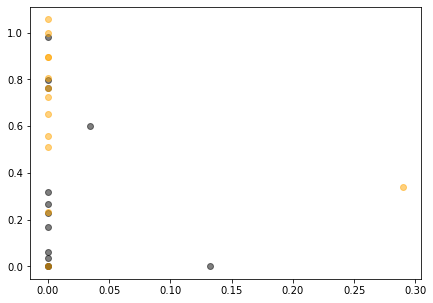

In [38]:
fig, axes = plt.subplots(1,figsize=(7,5))

get_hidden_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])

test_a = gm.getMapsRangeWindowed(4, 2, 3)
test_at = test_a.transpose()
hidden_layer_output = get_hidden_layer_output([test_at])[0]
plt.scatter(hidden_layer_output[:,0], hidden_layer_output[:,1], color="black",alpha=.5)

if False:
    test_a = gm.getMapsRangeWindowed(4, 1, 2)
    test_at = test_a.transpose()
    hidden_layer_output = get_hidden_layer_output([test_at])[0]
    plt.scatter(hidden_layer_output[:,0], hidden_layer_output[:,1], color="green", alpha=.5)

if False:
    test_a = gm.getMapsRangeWindowed(4, 2, 3)
    test_at = test_a.transpose()
    hidden_layer_output = get_hidden_layer_output([test_at])[0]
    plt.scatter(hidden_layer_output[:,0], hidden_layer_output[:,1], color="red", alpha=.5)


test_a = gm.getMapsRangeWindowed(4, 4, 5)
test_at = test_a.transpose()
hidden_layer_output = get_hidden_layer_output([test_at])[0]
plt.scatter(hidden_layer_output[:,0], hidden_layer_output[:,1], color="orange", alpha=.5)

